### Building and image classifier

#### Import tensorflow and keras. Check their versions 

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

In [5]:
#tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### load the dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

#### Check the shape and datatype

In [6]:
print('shape of train data ',X_train_full.shape)
print('data type of data ', X_train_full.dtype)

shape of train data  (60000, 28, 28)
data type of data  uint8


In [31]:
X_train_full[0]
y_train_full.shape

(60000,)

#### Data is already split into train and test. Now lets split the train set into train and validation sets

In [14]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

#### Creating the model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

###### get summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


##### get layers and weights and bias of  a layer

In [18]:
model.layers

In [20]:
print('name of 2nd layer',model.layers[1].name)
hidden1 = model.layers[1]
model.get_layer('dense') is hidden1

name of 2nd layer dense


True

In [21]:
# get weights and bias of a layer
weights, biases = hidden1.get_weights()
print('Weights are: ', weights)
print('Weights shape is :', weights.shape)
print('Biases are: ', biases)
print('Biases shape: ', biases.shape)

Weights are:  [[-0.04748179 -0.04051248 -0.03635199 ...  0.03225643 -0.0466223
  -0.03949397]
 [ 0.03374296  0.01654163  0.00308412 ... -0.00809839  0.01604458
   0.00278903]
 [ 0.06738305  0.02087943 -0.06319547 ... -0.07083491  0.01217709
   0.06645545]
 ...
 [-0.03733049 -0.04047425 -0.03171157 ... -0.06405405 -0.04911356
  -0.04187659]
 [ 0.06104152  0.01483353  0.01147107 ...  0.05029663 -0.07180604
   0.01100861]
 [ 0.05269496 -0.00247107 -0.0289289  ...  0.03996846  0.02177414
  -0.00136081]]
Weights shape is : (784, 300)
Biases are:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0

##### compile the model

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

##### Train and evaluate the model

In [23]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 2ms/step - loss: 0.7227 - accuracy: 0.7629 - val_loss: 0.5136 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4847 - accuracy: 0.8322 - val_loss: 0.4697 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8456 - val_loss: 0.4071 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4141 - accuracy: 0.8558 - val_loss: 0.3970 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3941 - accuracy: 0.8618 - val_loss: 0.4030 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8672 - val_loss: 0.3654 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3642 - accuracy: 0.8710 - val_loss: 0.3599 - val_accuracy

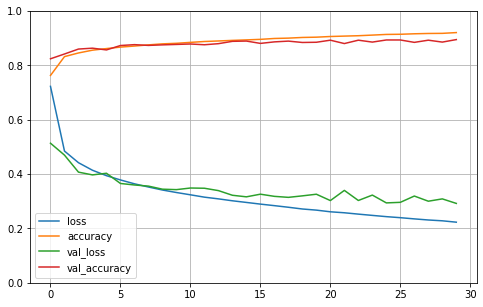

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(X_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 62.2329 - accuracy: 0.8489


[62.232913970947266, 0.8489000201225281]

### Using the model to make predictions

In [27]:
X_new = X_test_full[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)